In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

import seaborn as sns # library for data visualization and representation

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

import math # library for mathematical operations

# backend for rendering plots within the browser
%matplotlib inline


print('Libraries imported.')

Libraries imported.


#### Load and explore the data

Next, let's load the data.

In [2]:
data=pd.read_csv(r'C:\Users\cruise\desktop\Dataset\energydata_complete.csv', error_bad_lines=False)

In [3]:
# Viewing the first five (5) rows of the data
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
# Dimensionality of the data
print('The dataframe has {} rows and {} columns.'.format(
        data.shape[0],
        data.shape[1]
    )
)

The dataframe has 19735 rows and 29 columns.


In [5]:
#descriptive statistics of the data
data.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [6]:
# Summary of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
date           19735 non-null object
Appliances     19735 non-null int64
lights         19735 non-null int64
T1             19735 non-null float64
RH_1           19735 non-null float64
T2             19735 non-null float64
RH_2           19735 non-null float64
T3             19735 non-null float64
RH_3           19735 non-null float64
T4             19735 non-null float64
RH_4           19735 non-null float64
T5             19735 non-null float64
RH_5           19735 non-null float64
T6             19735 non-null float64
RH_6           19735 non-null float64
T7             19735 non-null float64
RH_7           19735 non-null float64
T8             19735 non-null float64
RH_8           19735 non-null float64
T9             19735 non-null float64
RH_9           19735 non-null float64
T_out          19735 non-null float64
Press_mm_hg    19735 non-null float64
RH_out         19735 n

In [7]:
# Counts of the unique values in the column
data['lights'].value_counts() 

0     15252
10     2212
20     1624
30      559
40       77
50        9
60        1
70        1
Name: lights, dtype: int64

In [8]:
# Due to conlusion made from the descriptive statistics, instruction, domain concept and the number of zeros in the light column
data.drop(columns=['lights','date'],inplace=True)

In [9]:
# Checking for the presence of null values in the dataframe
data.isna().values.any()

False

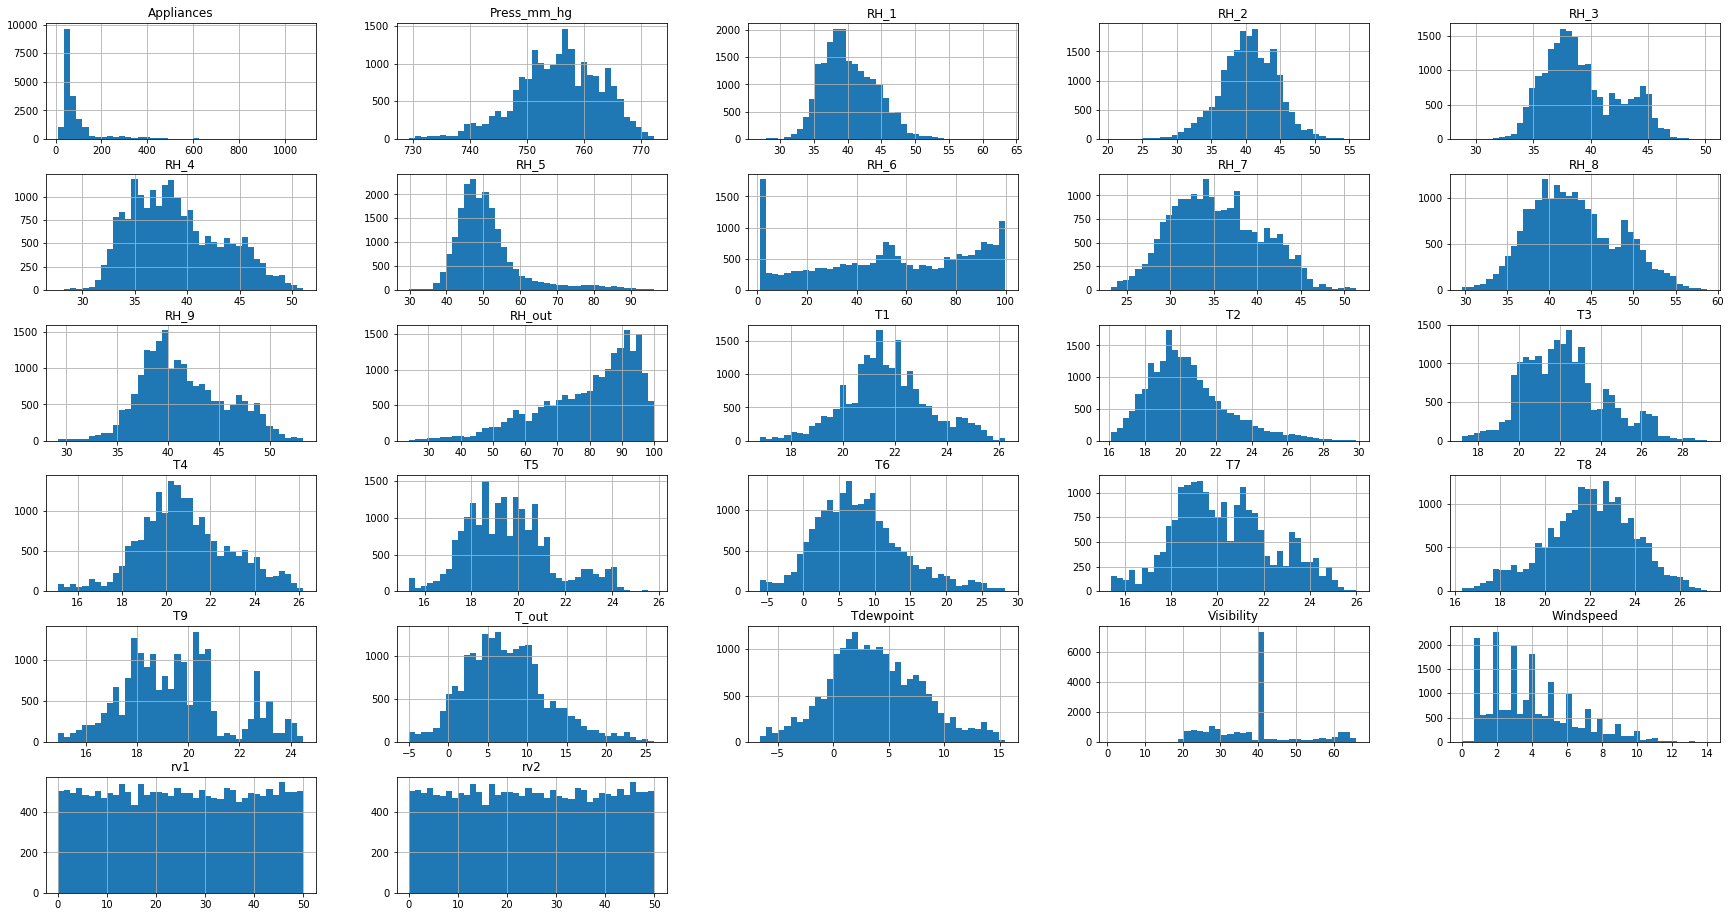

In [10]:
# checking the distribution of the features and label in the data
data.hist(bins=40,figsize=(30,16))
# show plot
plt.show() 

### Noticed majority of the data were normally distributed

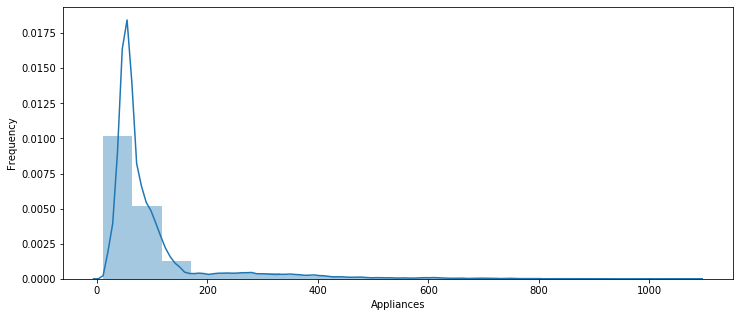

In [11]:
# Distribution of values in Applainces column
plt.figure(figsize=(12,5))
plt.xlabel('Appliance consumption in Wh')
plt.ylabel('Frequency')
sns.distplot(data['Appliances'] , bins=20 )
plt.show() # show plot 

### Presence of outliers and the graph is positively skewed in appliances column

In [12]:
# Checking correlations between features in the dataset
data.corr()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
Appliances,1.000000,0.055447,0.086031,0.120073,-0.060465,0.085060,0.036292,0.040281,0.016965,0.019760,0.006955,0.117638,-0.083178,0.025801,-0.055642,0.039572,-0.094039,0.010010,-0.051462,0.099155,-0.034885,-0.152282,0.087122,0.000230,0.015353,-0.011145,-0.011145
T1,0.055447,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,0.097861,0.885247,-0.014782,0.654769,-0.615045,0.838705,0.135182,0.825413,-0.006441,0.844777,0.071756,0.682846,-0.150574,-0.345481,-0.087654,-0.076210,0.571309,-0.006203,-0.006203
RH_1,0.086031,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,0.880359,0.205797,0.303258,0.316141,0.245126,0.021397,0.801122,-0.030053,0.736196,0.115263,0.764001,0.340767,-0.293957,0.274126,0.204932,-0.021057,0.639106,-0.000699,-0.000699
T2,0.120073,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,0.231563,0.720550,0.029595,0.801186,-0.580372,0.663660,0.229212,0.578191,0.068534,0.675535,0.157346,0.792255,-0.133028,-0.505291,0.052495,-0.069721,0.582602,-0.011087,-0.011087
RH_2,-0.060465,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,0.721435,0.110409,0.250271,-0.009670,0.389933,-0.051422,0.690584,-0.041023,0.679777,0.054544,0.676467,0.033674,-0.255646,0.584911,0.069190,-0.005368,0.499152,0.006275,0.006275
T3,0.085060,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,0.122737,0.888169,-0.066355,0.686882,-0.647672,0.847374,0.172624,0.795283,0.044427,0.901324,0.134602,0.699417,-0.189974,-0.281718,-0.100776,-0.102310,0.645886,-0.005194,-0.005194
RH_3,0.036292,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,0.898978,-0.050062,0.375422,0.076833,0.514912,-0.250090,0.832685,-0.283228,0.828822,-0.195270,0.833538,0.118207,-0.233274,0.356192,0.263188,0.017041,0.414387,-0.000477,-0.000477
T4,0.040281,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,-0.048650,0.871813,-0.076489,0.652350,-0.703149,0.877763,0.043527,0.796256,-0.095192,0.889439,-0.025549,0.663478,-0.075292,-0.388602,-0.185747,-0.104768,0.519471,-0.001815,-0.001815
RH_4,0.016965,0.097861,0.880359,0.231563,0.721435,0.122737,0.898978,-0.048650,1.000000,0.091812,0.352591,0.259047,0.392178,-0.131204,0.894301,-0.167066,0.847259,-0.044518,0.856591,0.293289,-0.250748,0.336813,0.300192,0.002636,0.616509,-0.001787,-0.001787
T5,0.019760,0.885247,0.205797,0.720550,0.110409,0.888169,-0.050062,0.871813,0.091812,1.000000,0.032786,0.629161,-0.632384,0.870624,0.148905,0.824981,0.016388,0.911055,0.072308,0.651321,-0.170999,-0.273953,-0.145011,-0.084164,0.588362,-0.005490,-0.005490


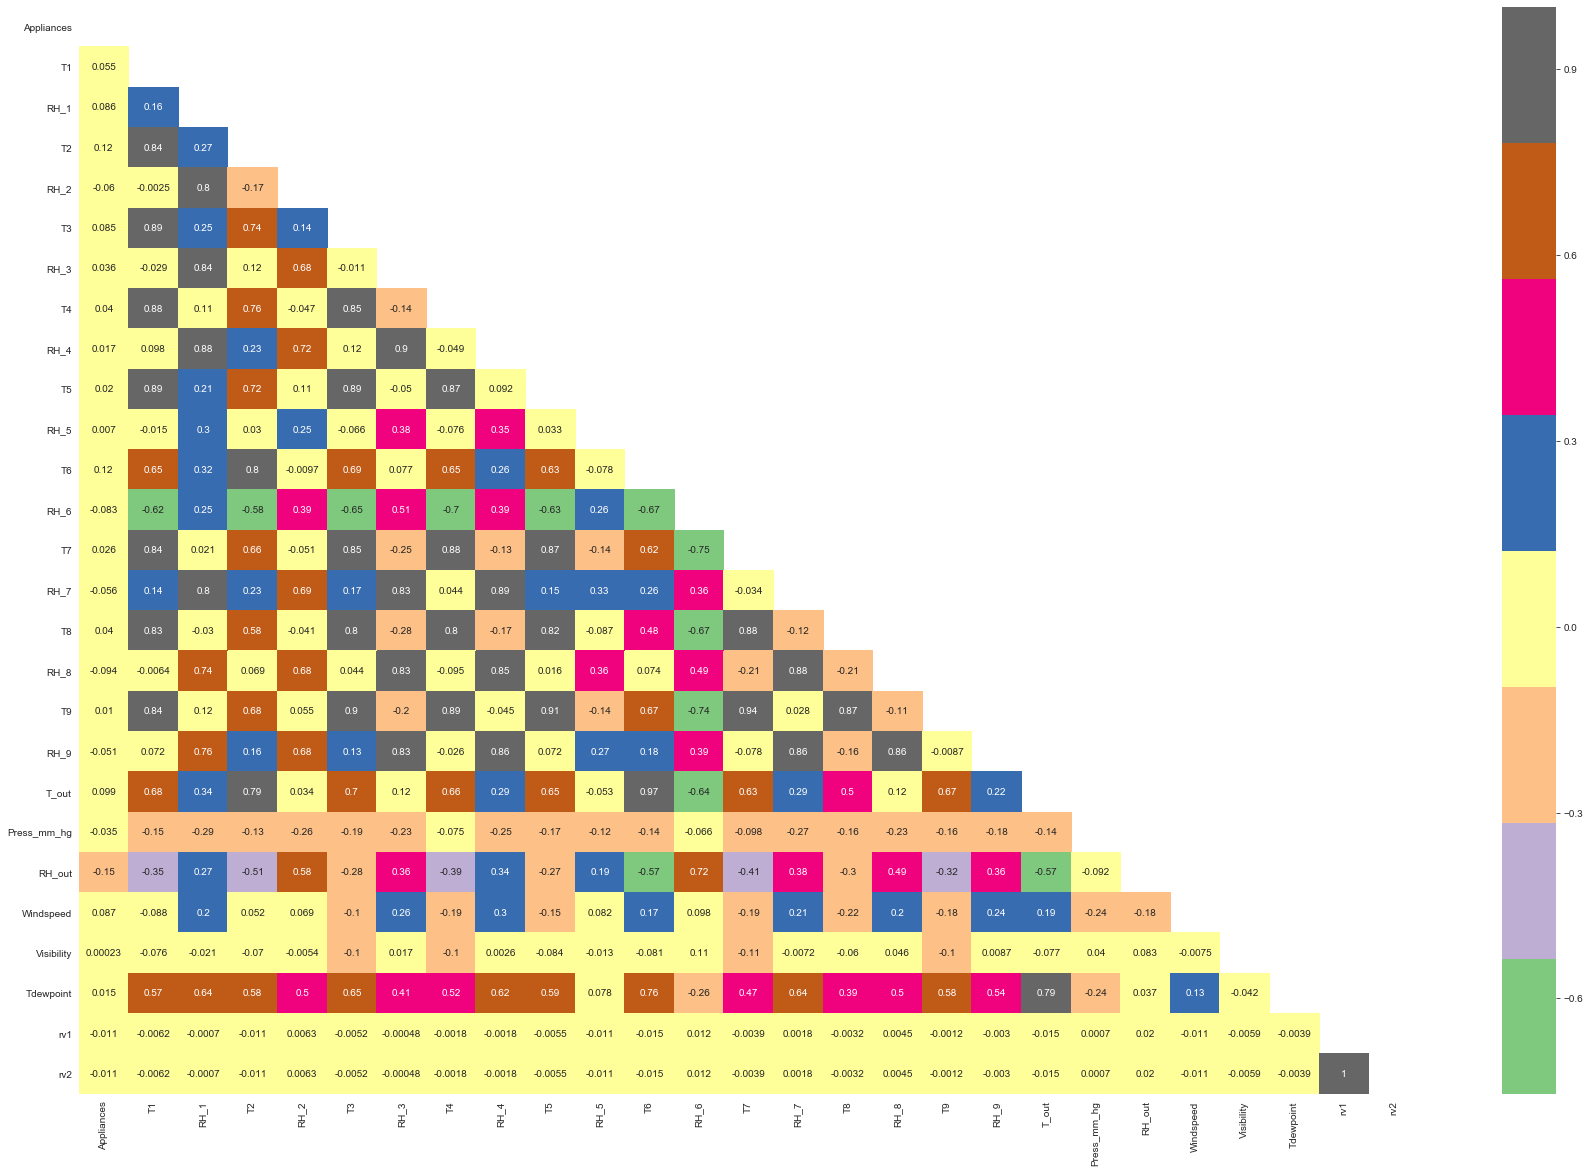

In [13]:
datacorr = data.corr()
# Changing correlation matrix shape for masking
matrix = np.triu(datacorr)


# Generating heatmap for the data correlation
plt.figure(figsize=(30,20))
sns.set_style("whitegrid")
sns.heatmap(datacorr, annot=True , mask=matrix, cmap='Accent')


# fix for matplotlib bug that cuts off top/bottom of seaborn visualizations
bottom, top = plt.ylim() # discover the values for bottom and top
bottom += 0.5
top -= 0.5
plt.ylim(bottom, top) # update the ylim values for bottom and top after addition and subtraction operation

# changing xtick rotation
plt.xticks(rotation=90)

# show plot
plt.show()

### The data exhibits multicollinearity

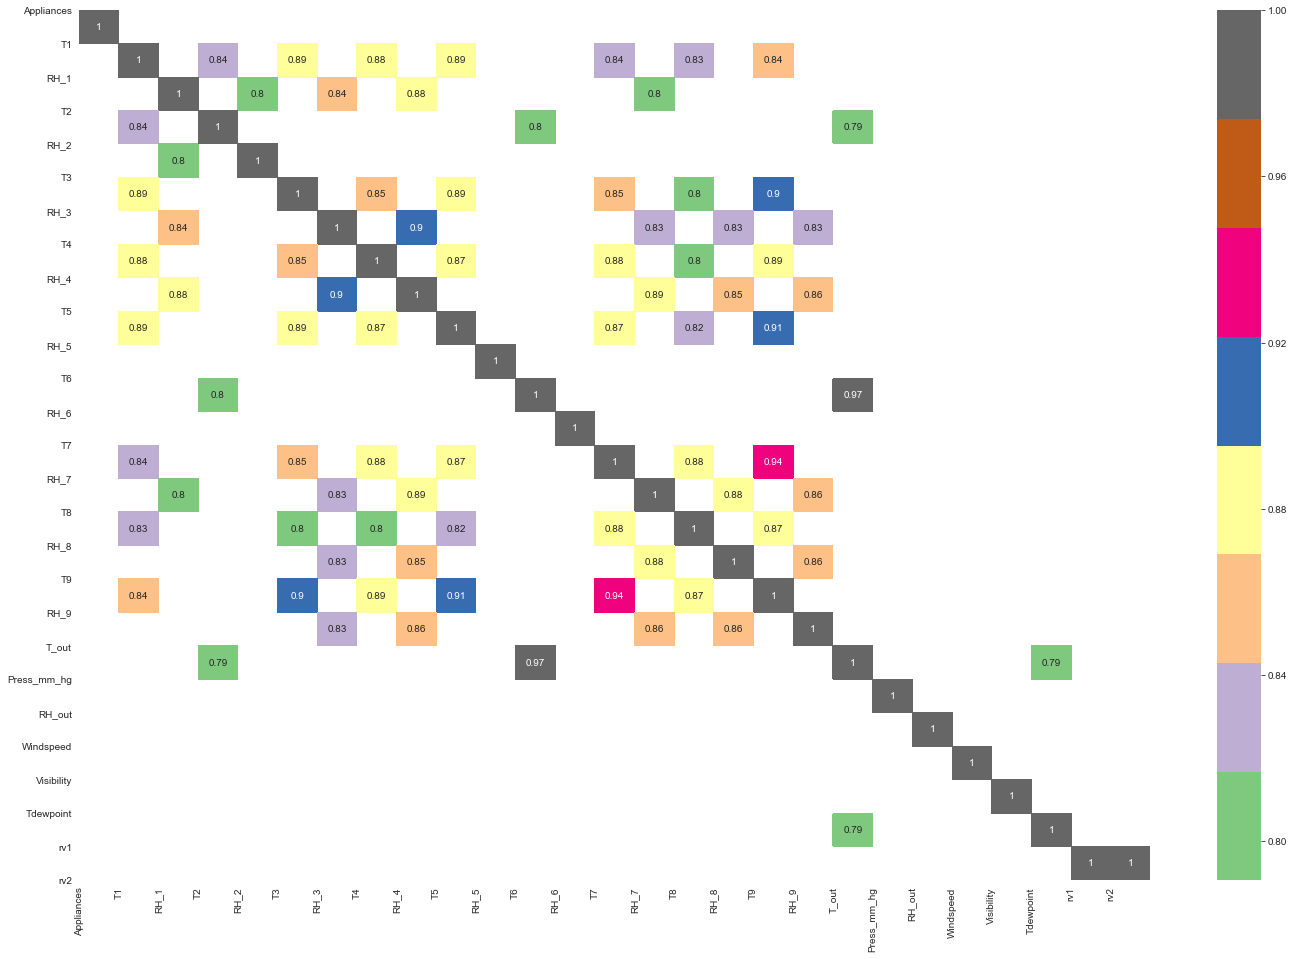

In [14]:
# Checking features that have correlations > 0.79 between each other in the dataset
corrhigh = datacorr[datacorr>.79]
plt.figure(figsize=(24,16))
sns.heatmap(corrhigh, annot=True, cmap='Accent')

# applying ticks
plt.xticks(range(len(data.columns)), data.columns) 
plt.yticks(range(len(data.columns)), data.columns)

# show plot
plt.show()

In [15]:
#Firstly, we normalise our dataset to a common scale using the min max scaler
from sklearn.preprocessing import MinMaxScaler
# initializing Minmaxscaler
scaler = MinMaxScaler() 

# Now let's fit and transform the Minmaxscaler with the data
scalerfit = scaler.fit_transform(data)

In [16]:
# Creating a new dataframe with the normalised and transformed data
normalised_df = pd.DataFrame((scalerfit), columns=data.columns)

# Generating the features dataframe
features_df = normalised_df.drop(columns=['Appliances'])

# Generating the target (appliances) column
target = normalised_df['Appliances']

In [17]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features_df, target, test_size=0.3, random_state=42)

In [18]:
# Initialize LinearRegression model
linear_model = LinearRegression()

# Fit the model to the training dataset
linear_model.fit(x_train, y_train)

# Obtain predictions
predicted_values = linear_model.predict(x_test)

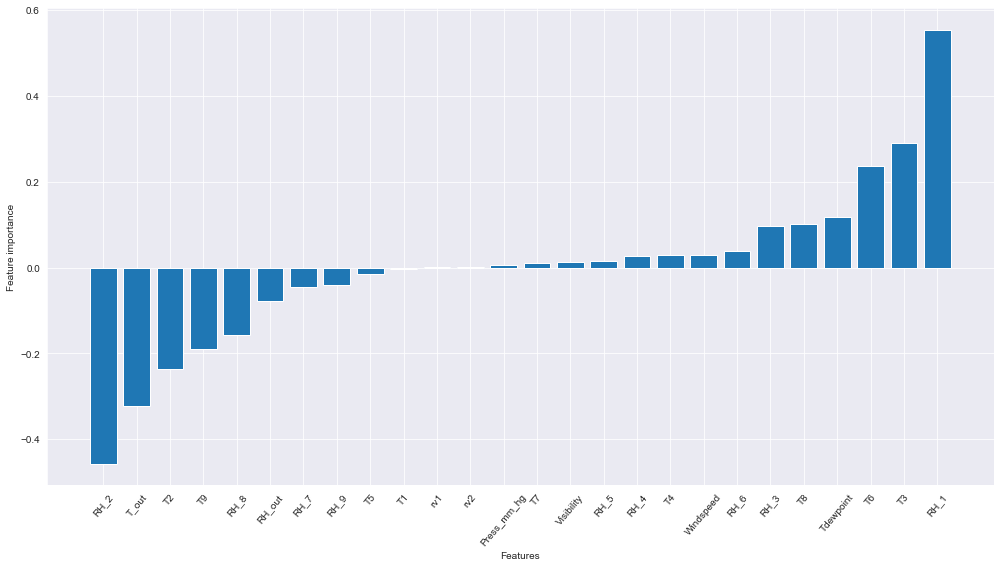

In [19]:
# summarize and sort feature importance for the linear model
importance = linear_model.coef_
col_sorted_by_importance=importance.argsort()

# Passing the sorted feature importance into a dataframe
feat_imp=pd.DataFrame({
    'cols':features_df.columns[col_sorted_by_importance],
    'imps':importance[col_sorted_by_importance]
})

# plot feature importance
plt.figure(figsize=(14,8))
sns.set_style("darkgrid")
plt.bar(x='cols', height='imps',data=feat_imp)
plt.ylabel('Feature importance')
plt.xlabel('Features')
plt.xticks(rotation=50)
plt.tight_layout()

In [20]:
# Estimating the Mean absolute error of the linear_model
from sklearn.metrics import mean_absolute_error

linearmae = mean_absolute_error(y_test, predicted_values)

round(linearmae, 2) 

0.05

In [21]:
# Estimating the Coefficient of Determination of the linear_model
from sklearn.metrics import r2_score

linearr2_score = r2_score(y_test, predicted_values)

round(linearr2_score, 2)

0.15

In [22]:
# Estimating the Residual Sum of Squares of the linear_model
linearrss = np.sum(np.square(y_test - predicted_values))

round(linearrss, 2)

45.35

In [23]:
# Estimating the Root Mean Squared Error of the linear_model
from sklearn.metrics import  mean_squared_error

linearrmse = np.sqrt(mean_squared_error(y_test, predicted_values))

round(linearrmse, 3)

0.088

In [24]:
#comparing the effects of regularisation

def get_weights_df(model, feat, col_name):

  """This function returns the weight of every feature."""

  weights = pd.Series(model.coef_, feat.columns).sort_values()

  weights_df = pd.DataFrame(weights).reset_index()

  weights_df.columns = ['Features', col_name]

  weights_df[col_name].round(3)

  return weights_df

In [25]:
# Initialize Lasso model with an alpha value of 0.001
lasso_reg = Lasso(alpha=0.001)

# Fit the model to the training dataset
lasso_reg.fit(x_train, y_train)

# Obtain predictions
lassopredicted_values = lasso_reg.predict(x_test)

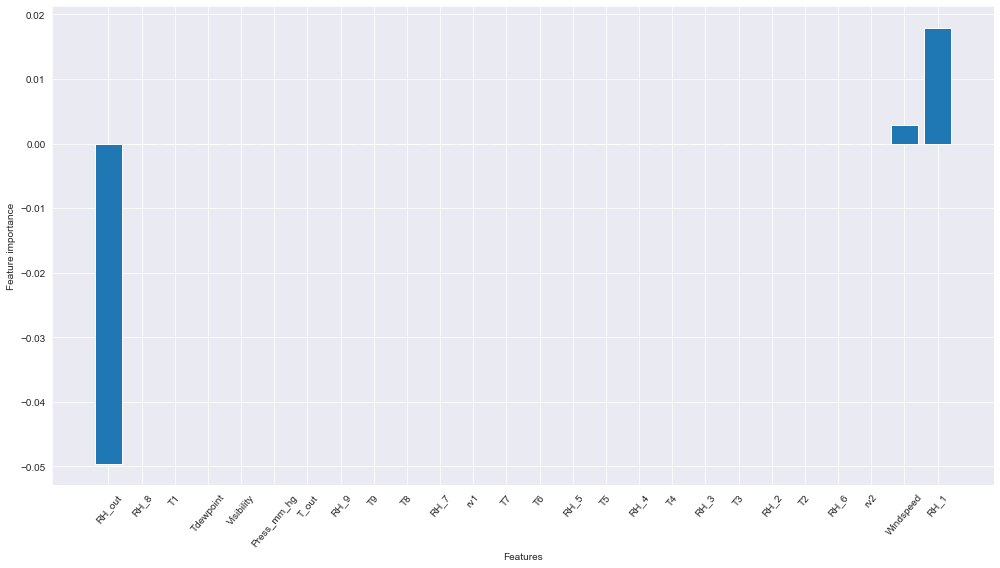

In [26]:
# summarize and sort feature importance for the lasso model
importance = lasso_reg.coef_
col_sorted_by_importance=importance.argsort()

# Passing the sorted feature importance into a dataframe
feat_imp2=pd.DataFrame({
    'cols':features_df.columns[col_sorted_by_importance],
    'imps':importance[col_sorted_by_importance]
})

# plot feature importance
plt.figure(figsize=(14,8))
sns.set_style("darkgrid")
plt.bar(x='cols', height='imps',data=feat_imp2)
plt.ylabel('Feature importance')
plt.xlabel('Features')
plt.xticks(rotation=50)
plt.tight_layout()

In [27]:
# Estimating the Root Mean Squared Error of the lasso_reg model with an alpha value of 0.001
from sklearn.metrics import  mean_squared_error

lassormse = np.sqrt(mean_squared_error(y_test, lassopredicted_values))

round(lassormse, 3) 

0.094

In [28]:
# Initialize Ridge model with an alpha value of 0.5 
ridge_reg = Ridge(alpha=0.5) 

# Fit the model to the training dataset
ridge_reg.fit(x_train, y_train)

# Obtain predictions
ridgepredicted_values = ridge_reg.predict(x_test)

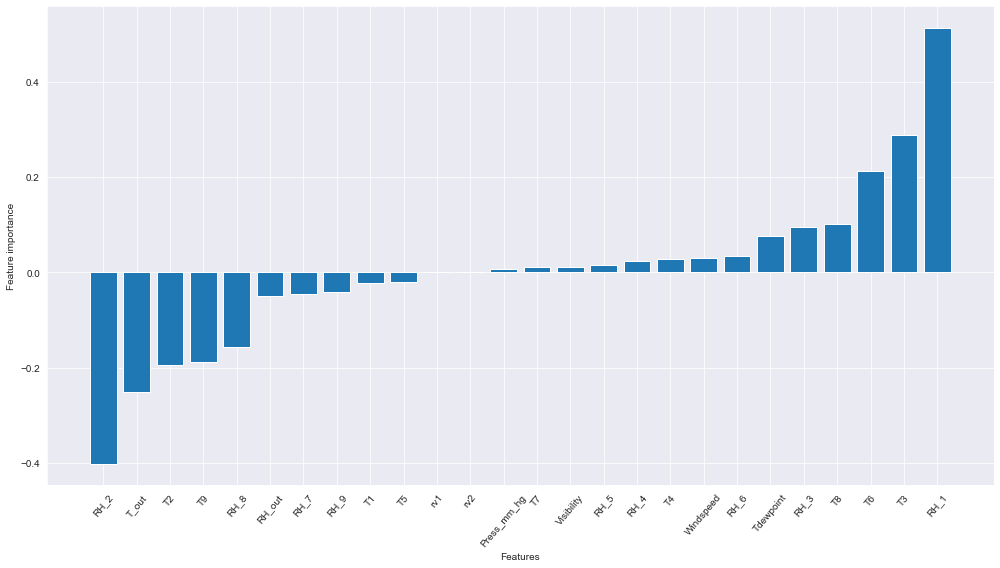

In [29]:
# summarize and sort feature importance for the ridge model
importance = ridge_reg.coef_
col_sorted_by_importance=importance.argsort()

# Passing the sorted feature importance into a dataframe
feat_imp3=pd.DataFrame({
    'cols':features_df.columns[col_sorted_by_importance],
    'imps':importance[col_sorted_by_importance]
})

# plot feature importance
plt.figure(figsize=(14,8))
sns.set_style("darkgrid")
plt.bar(x='cols', height='imps',data=feat_imp3)
plt.ylabel('Feature importance')
plt.xlabel('Features')
plt.xticks(rotation=50)
plt.tight_layout()

In [30]:
# Estimating the Root Mean Squared Error of the ridge_reg model with an alpha value of 0.5
from sklearn.metrics import  mean_squared_error

ridgermse1 = np.sqrt(mean_squared_error(y_test, ridgepredicted_values))

round(ridgermse1, 2)

0.09

In [31]:
# Initialize Ridge model with an alpha value of 0.4
ridge_reg2 = Ridge(alpha=0.4) 

# Fit the model to the training dataset
ridge_reg2.fit(x_train, y_train)

# Obtain predictions
ridgepredicted_values2 = ridge_reg2.predict(x_test)

In [32]:
# Estimating the Root Mean Squared Error of the ridge_reg model with an alpha value of 0.4
from sklearn.metrics import  mean_squared_error

ridgermse2 = np.sqrt(mean_squared_error(y_test, ridgepredicted_values2))

round(ridgermse2, 2)

0.09

### Applying the get_weights_df function to the lasso,linear_model and ridge model

In [33]:
linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')

ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')

lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')

### Merging the linear_model_weights, ridge_weights_df, lasso_weights_df columns

In [34]:
final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')

final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')

In [35]:
final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight
0,RH_2,-0.456698,-0.401134,-0.000000
1,T_out,-0.321860,-0.250765,0.000000
2,T2,-0.236178,-0.193880,0.000000
3,T9,-0.189941,-0.188584,-0.000000
4,RH_8,-0.157595,-0.156596,-0.000110
5,RH_out,-0.077671,-0.050541,-0.049557
6,RH_7,-0.044614,-0.046291,-0.000000
7,RH_9,-0.039800,-0.041701,-0.000000
8,T5,-0.015657,-0.020727,-0.000000
9,T1,-0.003281,-0.021549,0.000000


# Quiz solution and references

### Question 2

In [36]:
# Train a lasso regression model with an alpha value of 0.001 and obtain the new feature weights with it. 
# How many of the features have non-zero feature weights?

np.count_nonzero(final_weights['Lasso_weight'])

4

### Question 4

#### reference to cell 35

In [37]:
# Obtain the feature weights from your linear model above. 
# Which features have the lowest and highest weights respectively?

linmax=final_weights['Linear_Model_Weight'].idxmax()
linmin=final_weights['Linear_Model_Weight'].idxmin()

final_weights['Features'].iloc[[linmax,linmin]] 

25    RH_1
0     RH_2
Name: Features, dtype: object

### Question 6

#### reference to cell 22

In [38]:
# Estimating the Residual Sum of Squares (rss)

# rss in 2 decimal places
round(linearrss, 2) 

45.35

### Question 8

#### reference to cell 21

In [39]:
# What is the Coefficient of Determination (in two decimal places)?

# r2_score in 2 decimal places
round(linearr2_score, 2)

0.15

### Question 10

#### reference to cell 20

In [40]:
# What is the Mean Absolute Error (MAE) (in two decimal places)?

# MAE in 2 decimal places
round(linearmae, 2)

0.05

### Question 11

#### reference to cell 27

In [41]:
# What is the new RMSE with the Lasso Regression (in 3 decimal places)?  

# RMSE in 3 decimal places
round(lassormse, 3)

0.094

### Question 13

#### reference to cell 30 and 32

In [42]:
# Train a ridge regression model with an alpha value of 0.4. 
# Is there any change to the root mean squared error (RMSE) when evaluated on the test set?

print(round(ridgermse1, 2),'with an alpha value of 0.05','and',round(ridgermse2, 2),'with an alpha value of 0.04')
print('No change')

0.09 with an alpha value of 0.05 and 0.09 with an alpha value of 0.04
No change


### Question 17

#### reference to cell 23

In [43]:
# What is the Root Mean Squared Error for linaer model (in three decimal places)?

# RMSE in 3 decimal places
round(linearrmse, 3)

0.088

### Question 18

In [44]:
# From the dataset, fit a linear model on the relationship between the temperature in the living room in Celsius (x = T2) and the temperature outside the building (y = T6). 
# What is the R^2 value in two D.P?

#### reference to cell 16

In [45]:
# Generating x and y columns
x=normalised_df['T2']
y=normalised_df['T6']

# Creating dataframes for x and y columns
xi=pd.DataFrame(normalised_df['T2'])
yi=pd.DataFrame(normalised_df['T6'])

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

xi_train, xi_test, yi_train, yi_test = train_test_split(xi, yi, test_size=0.3, random_state=42)

In [47]:
# Initialize LinearRegression model
linear_model2 = LinearRegression()

# Fit the model to the training dataset
linear_model2.fit(xi_train, yi_train)

# Obtain predictions
predicted_values2 = linear_model2.predict(xi_test)

In [48]:
# Estimating the Coefficient of Determination of linear_model2
from sklearn.metrics import r2_score

r2_score = r2_score(yi_test, predicted_values2)

# r2_score in 2 decimal places
round(r2_score, 2)

0.64